In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('properties_outlier_treated.csv')

In [4]:
df.head()

property_type                society      sector  price  price_per_sqft  \
0          flat         dlf the ultima   sector 81   2.20         10476.0   
1          flat   siddhartha apartment   sector 95   1.10          4327.0   
2          flat      chintels paradiso  sector 109   1.97          7490.0   
3          flat        ambience lagoon   sector 24   5.80         12500.0   
4          flat  shri balaji apartment   sector 12   0.35          4037.0   

     area                                       areaWithType  bedRoom  \
0  2100.0              Super Built up area 2100(195.1 sq.m.)        3   
1  2542.0                   Carpet area: 2542 (236.16 sq.m.)        4   
2  2630.0             Super Built up area 2630(244.33 sq.m.)        4   
3  4640.0                 Built Up area: 3700 (343.74 sq.m.)        3   
4   867.0  Super Built up area 867(80.55 sq.m.)Built Up a...        2   

   bathroom balcony  floorNum      facing   agePossession  \
0         4      3+      17.0        East  Relatively New   
1         3       3       9.0       North  Relatively New   
2         4       2      11.0  North-East  Relatively New   
3         4      3+       9.0  North-East    Old Property   
4         2       1       1.0       North  Moderately Old   

   super_built_up_area  built_up_area  carpet_area  study room  servant room  \
0               2100.0            NaN          NaN           0             1   
1                  NaN            NaN       2542.0           0             1   
2               2630.0            NaN          NaN           0             1   
3                  NaN         3700.0          NaN           1             1   
4                867.0          737.0        650.0           0             0   

   store room  pooja room  others  furnishing_type  luxury_score  \
0           0           0       0                2            49   
1           0           0       1                0            22   
2           0           1       0                0            49   
3           0           1       1                2            68   
4           0           0       0                0            23   

   area_room_ratio  
0       700.000000  
1       635.500000  
2       657.500000  
3      1546.666667  
4       433.500000

In [5]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1968
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

### Built up area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

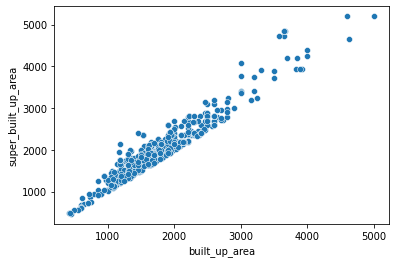

In [7]:
sns.scatterplot(x=df['built_up_area'],y=df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

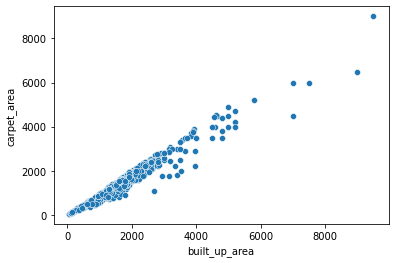

In [8]:
sns.scatterplot(x=df['built_up_area'],y=df['carpet_area'])

In [10]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3550    False
3551    False
3552    False
3553    False
3554    False
Length: 3555, dtype: bool

In [11]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [12]:
all_present_df.shape

(531, 24)

In [13]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [14]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [15]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [16]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [17]:
sbc_df.head()

property_type                  society      sector  price  price_per_sqft  \
9           flat           suncity avenue  sector 102   0.48          9023.0   
15          flat             tulip violet   sector 69   1.37          8676.0   
20          flat  shree vardhman victoria   sector 70   1.64          8410.0   
33          flat     emaar gurgaon greens  sector 102   1.52          9212.0   
35          flat  shree vardhman victoria   sector 70   1.63          8359.0   

      area                                       areaWithType  bedRoom  \
9    532.0  Super Built up area 632(58.71 sq.m.)Carpet are...        2   
15  1579.0  Super Built up area 1578(146.6 sq.m.)Carpet ar...        3   
20  1950.0  Super Built up area 1950(181.16 sq.m.)Carpet a...        3   
33  1650.0  Super Built up area 1650(153.29 sq.m.)Carpet a...        3   
35  1950.0  Super Built up area 1950(181.16 sq.m.)Carpet a...        3   

    bathroom balcony  floorNum      facing   agePossession  \
9          2       1       5.0  North-East  Relatively New   
15         3       1      12.0        East  Relatively New   
20         5       3       8.0  North-East  Relatively New   
33         3       3       7.0  North-West  Relatively New   
35         5       3      12.0        East  Relatively New   

    super_built_up_area  built_up_area  carpet_area  study room  servant room  \
9                 632.0            NaN       532.00           0             0   
15               1578.0            NaN      1538.00           0             0   
20               1950.0            NaN      1161.00           0             1   
33               1650.0            NaN      1022.58           0             1   
35               1950.0            NaN      1161.00           0             1   

    store room  pooja room  others  furnishing_type  luxury_score  \
9            1           0       0                0           159   
15           0           1       0                0            95   
20           0           0       0                0           126   
33           0           0       0                1           137   
35           0           0       0                0            43   

    area_room_ratio  
9        266.000000  
15       526.333333  
20       650.000000  
33       550.000000  
35       650.000000

In [18]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

C:\Users\Vedant\AppData\Local\Temp\ipykernel_13980\1215074969.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)
C:\Users\Vedant\AppData\Local\Temp\ipykernel_13980\1215074969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

In [19]:
df.update(sbc_df)

In [20]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1547
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [21]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [22]:
sb_df.head()

property_type                      society             sector  price  \
0           flat               dlf the ultima          sector 81   2.20   
2           flat            chintels paradiso         sector 109   1.97   
5           flat  bestech park view grand spa          sector 81   4.50   
8           flat                tata primanti          sector 72   4.10   
12          flat              ramprastha city  dwarka expressway   1.30   

    price_per_sqft    area                            areaWithType  bedRoom  \
0          10476.0  2100.0   Super Built up area 2100(195.1 sq.m.)        3   
2           7490.0  2630.0  Super Built up area 2630(244.33 sq.m.)        4   
5          10714.0  4200.0  Super Built up area 4200(390.19 sq.m.)        4   
8          14099.0  2908.0  Super Built up area 2905(269.88 sq.m.)        4   
12          9028.0  1440.0  Super Built up area 1440(133.78 sq.m.)        3   

    bathroom balcony  floorNum      facing       agePossession  \
0          4      3+      17.0        East      Relatively New   
2          4       2      11.0  North-East      Relatively New   
5          6      3+      17.0         NaN      Relatively New   
8          5      3+      39.0         NaN        New Property   
12         3       2       3.0         NaN  Under Construction   

    super_built_up_area  built_up_area  carpet_area  study room  servant room  \
0                2100.0            NaN          NaN           0             1   
2                2630.0            NaN          NaN           0             1   
5                4200.0            NaN          NaN           0             1   
8                2905.0            NaN          NaN           0             1   
12               1440.0            NaN          NaN           0             0   

    store room  pooja room  others  furnishing_type  luxury_score  \
0            0           0       0                2            49   
2            0           1       0                0            49   
5            0           0       0                1            44   
8            0           0       1                0           103   
12           0           0       0                0             0   

    area_room_ratio  
0             700.0  
2             657.5  
5            1050.0  
8             727.0  
12            480.0

In [23]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

C:\Users\Vedant\AppData\Local\Temp\ipykernel_13980\1714170073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)
C:\Users\Vedant\AppData\Local\Temp\ipykernel_13980\1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(r

In [24]:
df.update(sb_df)

In [25]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area           672
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [26]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [27]:
c_df.head()

property_type                  society      sector  price  price_per_sqft  \
1           flat     siddhartha apartment   sector 95   1.10          4327.0   
6           flat     umang monsoon breeze   sector 78   0.69          5391.0   
7           flat           vatika gurgaon   sector 83   1.19          7438.0   
29          flat  signature global solera  sector 107   0.28          5833.0   
36          flat            kamroon court   sector 43   2.75         13750.0   

      area                      areaWithType  bedRoom  bathroom balcony  \
1   2542.0  Carpet area: 2542 (236.16 sq.m.)        4         3       3   
6   1280.0  Carpet area: 1280 (118.92 sq.m.)        2         2       2   
7   1600.0  Carpet area: 1600 (148.64 sq.m.)        3         3       2   
29   480.0    Carpet area: 489 (45.43 sq.m.)        2         2       2   
36  2000.0  Carpet area: 2000 (185.81 sq.m.)        3         4      3+   

    floorNum      facing   agePossession  super_built_up_area  built_up_area  \
1        9.0       North  Relatively New                  NaN            NaN   
6       11.0         NaN  Moderately Old                  NaN            NaN   
7       10.0       South  Relatively New                  NaN            NaN   
29      11.0       South  Relatively New                  NaN            NaN   
36       5.0  North-East  Moderately Old                  NaN            NaN   

    carpet_area  study room  servant room  store room  pooja room  others  \
1        2542.0           0             1           0           0       1   
6        1280.0           0             0           0           0       0   
7        1600.0           0             1           0           0       0   
29        489.0           0             0           0           0       0   
36       2000.0           0             1           0           0       1   

    furnishing_type  luxury_score  area_room_ratio  
1                 0            22       635.500000  
6                 0            60       640.000000  
7                 1            35       533.333333  
29                0            45       240.000000  
36                1            49       666.666667

In [28]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

C:\Users\Vedant\AppData\Local\Temp\ipykernel_13980\2136919732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)
C:\Users\Vedant\AppData\Local\Temp\ipykernel_13980\2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['ca

In [29]:
df.update(c_df)

In [30]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area             0
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

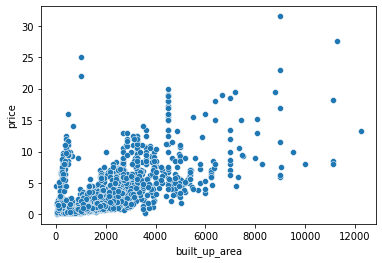

In [31]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [32]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [34]:
anamoly_df.sample(5)

price    area  built_up_area
797    3.00  1667.0         1654.0
1929   2.80  1700.0         1920.0
237    4.50  1350.0          160.0
1163   5.25  1350.0          160.0
834    4.75  2367.0          261.0

In [35]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [36]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

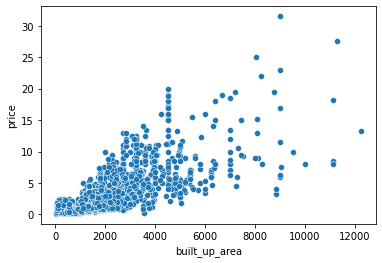

In [37]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [38]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [39]:
df.head()

property_type                society      sector  price  price_per_sqft  \
0          flat         dlf the ultima   sector 81   2.20         10476.0   
1          flat   siddhartha apartment   sector 95   1.10          4327.0   
2          flat      chintels paradiso  sector 109   1.97          7490.0   
3          flat        ambience lagoon   sector 24   5.80         12500.0   
4          flat  shri balaji apartment   sector 12   0.35          4037.0   

   bedRoom  bathroom balcony  floorNum      facing   agePossession  \
0        3         4      3+      17.0        East  Relatively New   
1        4         3       3       9.0       North  Relatively New   
2        4         4       2      11.0  North-East  Relatively New   
3        3         4      3+       9.0  North-East    Old Property   
4        2         2       1       1.0       North  Moderately Old   

   built_up_area  study room  servant room  store room  pooja room  others  \
0         1900.0           0             1           0           0       0   
1         2824.0           0             1           0           0       1   
2         2380.0           0             1           0           1       0   
3         3700.0           1             1           0           1       1   
4          737.0           0             0           0           0       0   

   furnishing_type  luxury_score  
0                2            49  
1                0            22  
2                0            49  
3                2            68  
4                0            23

In [40]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

### floorNum

In [41]:
df[df['floorNum'].isnull()]

property_type                  society             sector  price  \
293          house       vipul tatvam villa          sector 48   8.50   
619          house              independent          sector 24   1.45   
686          house              independent           sector 7   6.50   
993           flat       experion heartsong  dwarka expressway   1.08   
1407         house     dlf new town heights          sector 86   2.47   
1660         house       emaar mgf marbella          sector 66   9.00   
2047         house              independent           sector 3   1.50   
2098         house        ansal sushant lok          sector 43  10.50   
2136         house              independent           sector 4   4.12   
2544         house               jacob pura          sector 12   0.35   
2599          flat                      NaN          sector 78   0.60   
2822         house              independent          sector 26   4.60   
3044         house  ansal sushant lok plots          sector 43   3.30   
3456         house              independent           sector 4   0.65   
3457         house              independent           sector 2   5.60   
3517         house              independent          sector 25  13.00   
3539         house       vipul tatvam villa          sector 48   8.50   

      price_per_sqft  bedRoom  bathroom balcony  floorNum      facing  \
293          26235.0        4         4       1       NaN         NaN   
619           2984.0        3         3       1       NaN         NaN   
686          15046.0        3         2      3+       NaN         NaN   
993           6150.0        3         3       0       NaN         NaN   
1407          7719.0        4         4      3+       NaN        West   
1660         21251.0        4         4      3+       NaN  South-West   
2047         10288.0        3         3       0       NaN         NaN   
2098         27911.0        4         4       2       NaN  North-East   
2136          8889.0        2         1      3+       NaN         NaN   
2544          9722.0        2         1       0       NaN         NaN   
2599          3692.0        2         2       0       NaN         NaN   
2822         12198.0        4         4      3+       NaN         NaN   
3044         26570.0        1         1       0       NaN         NaN   
3456         11111.0        4         2       2       NaN         NaN   
3457         17284.0        8         6      3+       NaN  South-West   
3517         45710.0        6         8      3+       NaN         NaN   
3539         26235.0        4         4       2       NaN        East   

           agePossession  built_up_area  study room  servant room  store room  \
293       Relatively New         3240.0           0             0           0   
619         Old Property          540.0           0             0           0   
686         Old Property         4320.0           0             0           0   
993   Under Construction         1758.0           0             0           0   
1407      Moderately Old         2800.0           0             1           0   
1660      Relatively New         5200.0           0             1           1   
2047        Old Property          210.0           0             0           0   
2098        Old Property         3762.0           0             1           0   
2136      Moderately Old         4635.0           0             0           0   
2544        Old Property          360.0           0             0           0   
2599  Under Construction         1625.0           0             0           0   
2822        Old Property         3771.0           0             0           0   
3044  Under Construction         1242.0           0             0           0   
3456      Moderately Old          585.0           0             0           0   
3457      Moderately Old         3240.0           1             1           1   
3517      Relatively New         2844.0           1             1           1  

In [42]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [43]:
df['floorNum'].fillna(2.0,inplace=True)

C:\Users\Vedant\AppData\Local\Temp\ipykernel_13980\15612474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0,inplace=True)


In [44]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [45]:
1011/df.shape[0]

0.2843881856540084

### facing

<Axes: ylabel='count'>

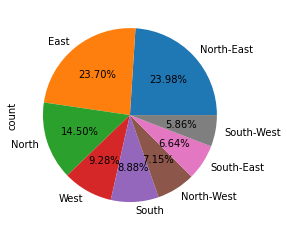

In [46]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [47]:
df.drop(columns=['facing'],inplace=True)

In [48]:
df.sample(5)

property_type                               society      sector  price  \
899           flat  shapoorji pallonji joyville gurugram  sector 102   1.80   
3463          flat      emaar mgf emerald floors premier   sector 65   2.29   
121           flat                       the close north   sector 50   2.75   
3133          flat                        raheja revanta   sector 78   0.99   
1700          flat                         orchid petals   sector 49   2.35   

      price_per_sqft  bedRoom  bathroom balcony  floorNum       agePossession  \
899          10638.0        3         3       3       5.0      Relatively New   
3463         13879.0        3         4      3+       2.0      Relatively New   
121          12500.0        3         3       3       3.0      Moderately Old   
3133          6100.0        2         2       3      14.0  Under Construction   
1700         11559.0        3         3       3      15.0      Relatively New   

      built_up_area  study room  servant room  store room  pooja room  others  \
899          1531.0           0             0           0           0       0   
3463         1833.0           1             1           0           0       0   
121          2400.0           0             1           0           0       0   
3133         1467.0           0             0           0           0       1   
1700         2030.0           0             0           0           0       1   

      furnishing_type  luxury_score  
899                 0            49  
3463                2           174  
121                 0           110  
3133                0            39  
1700                0            49

In [49]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [51]:
df.drop(index=[2599],inplace=True)

In [52]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

### agePossession

In [53]:
df['agePossession'].value_counts()

agePossession
Relatively New        1605
New Property           557
Moderately Old         545
Old Property           293
Undefined              291
Under Construction     263
Name: count, dtype: int64

In [54]:
df[df['agePossession'] == 'Undefined']

property_type              society      sector  price  price_per_sqft  \
17            flat        ashiana anmol  sohna road   0.90          7059.0   
40           house          independent   sector 50   6.50         21667.0   
46            flat   ambience caitriona   sector 24  14.00         22222.0   
78           house          independent   sector 13   0.62          3588.0   
96            flat      ansal height 86   sector 86   0.80          5882.0   
...            ...                  ...         ...    ...             ...   
3494          flat          spaze privy   sector 72   1.90          9620.0   
3505         house          independent   sector 56   2.95         20233.0   
3507         house          independent  sector 37d   1.16          7537.0   
3526          flat         lord krishna   sector 12   2.70          8571.0   
3528          flat  aipl zen residences  sector 70a   1.25          9905.0   

      bedRoom  bathroom balcony  floorNum agePossession  built_up_area  \
17          2         2       2       8.0     Undefined         1275.0   
40          5         6       0       1.0     Undefined         3000.0   
46          4         5       3       3.0     Undefined         6300.0   
78          6         6       0       3.0     Undefined          192.0   
96          2         2       0       1.0     Undefined         1360.0   
...       ...       ...     ...       ...           ...            ...   
3494        3         3       3      10.0     Undefined         1975.0   
3505        2         2       0       1.0     Undefined         1458.0   
3507        1         1       0       1.0     Undefined         1535.0   
3526        4         3       3       6.0     Undefined         3150.0   
3528        2         2       3      19.0     Undefined         1402.0   

      study room  servant room  store room  pooja room  others  \
17             0             0           0           0       0   
40             0             0           0           0       0   
46             0             0           0           0       0   
78             0             0           0           0       0   
96             0             0           0           0       0   
...          ...           ...         ...         ...     ...   
3494           0             0           0           0       0   
3505           0             0           0           0       0   
3507           0             0           0           0       0   
3526           0             0           0           0       0   
3528           0             0           0           0       0   

      furnishing_type  luxury_score  
17                  0             0  
40                  0             0  
46                  0             0  
78                  0             0  
96                  0             0  
...               ...           ...  
3494                0             0  
3505                0             0  
3507                0             0  
3526                0             0  
3528                0             0  

[291 rows x 18 columns]

In [55]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [56]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [57]:
df['agePossession'].value_counts()

agePossession
Relatively New        1717
New Property           597
Moderately Old         584
Old Property           326
Under Construction     277
Undefined               53
Name: count, dtype: int64

In [58]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [59]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [60]:
df['agePossession'].value_counts()

agePossession
Relatively New        1726
New Property           598
Moderately Old         591
Old Property           329
Under Construction     277
Undefined               33
Name: count, dtype: int64

In [61]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [62]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [63]:
df['agePossession'].value_counts()

agePossession
Relatively New        1728
Moderately Old         622
New Property           598
Old Property           329
Under Construction     277
Name: count, dtype: int64

In [64]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [65]:
df.shape

(3554, 18)

In [66]:
df.to_csv('properties_missing_value_imputation.csv',index=False)